In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys
sys.path.append("..")
import bopt

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

tf.enable_eager_execution()

import tensorflow_probability as tfp

tfd = tfp.distributions
psd_kernels = tfp.positive_semidefinite_kernels

ModuleNotFoundError: No module named 'tensorflow_probability'

In [4]:
kernel = psd_kernels.ExponentiatedQuadratic()
index_points = np.linspace(-1, 1, 100).reshape(-1, 1)

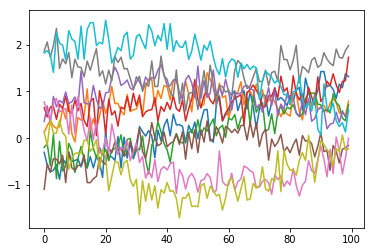

In [5]:
gp = tfd.GaussianProcess(kernel, index_points)
samples = gp.sample(10)

noisy_gp = tfd.GaussianProcess(kernel, index_points, observation_noise_variance=0.05)
noisy_samples = noisy_gp.sample(10)

plt.plot(noisy_samples.numpy().T)
plt.show()

In [6]:
from plotly import __version__
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

ModuleNotFoundError: No module named 'plotly'

In [7]:
kernel = psd_kernels.ExponentiatedQuadratic(length_scale=tf.constant(0.3, dtype=tf.float64),
                                            amplitude=tf.constant(0.3, dtype=tf.float64))
gp = tfd.GaussianProcess(kernel, X[:])
nll = -gp.log_prob(Y[:]).numpy()

print(nll)

NameError: name 'X' is not defined

In [8]:
def gp_nll(X, Y, l, s):
    X = tf.convert_to_tensor(X, dtype=tf.float64)
    Y = tf.convert_to_tensor(Y, dtype=tf.float64)
    
    if X.ndim == 1:
        X = tf.expand_dims(X, -1)
    
#     import pdb; pdb.set_trace()
    
    l = tf.constant(l, dtype=tf.float64)
    s = tf.constant(s, dtype=tf.float64)
    
    kernel = psd_kernels.ExponentiatedQuadratic(length_scale=l, amplitude=s)
    gp = tfd.GaussianProcess(kernel, X, observation_noise_variance=tf.Variable(0.48, dtype=tf.float64))
    neg_log_likelihood = -gp.log_prob(Y)
    
    #assert neg_log_likelihood >= 0, f"got logprob < 0 ... {neg_log_likelihood} for l={l}"
    
    return neg_log_likelihood

In [9]:
from functools import partial


def plot_kernel_nll(X, Y):    
    res = 20

    L = np.linspace(1.1, 3.5, num=res, dtype=np.float64)
    S = np.linspace(2.1, 5., num=res, dtype=np.float64)
    
    l, s = np.meshgrid(L, S)
    rows = np.array(np.vectorize(partial(gp_nll, X, Y))(l, s))
    plt.pcolor(L, S, rows, cmap="jet")
    plt.colorbar()
    plt.show()

In [10]:
X = np.sort(np.random.uniform(0., 1., [50, 1]).astype(np.float64), axis=0)
Y = np.array(list(map(lambda x: np.sin(x[0]), X))).astype(np.float64)        

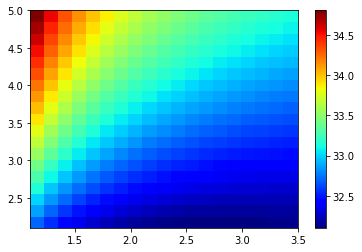

In [11]:
plot_kernel_nll(X, Y)

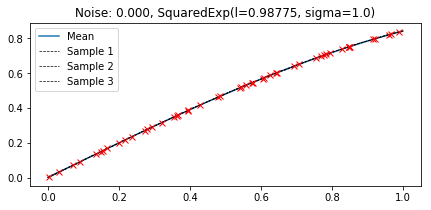

In [12]:
bopt.GaussianProcess().fit(X.reshape(-1), Y).optimize_kernel().posterior(np.linspace(0., 1.)).plot_posterior()

In [13]:
np.array([1,2,3]).reshape(-1, 1).shape

(3, 1)

In [15]:
gp_nll(np.expand_dims(X_train, -1), y_train, 0.1, 0.1)

NameError: name 'X_train' is not defined

In [16]:
plot_kernel_nll(np.expand_dims(X_train, -1), y_train)

NameError: name 'X_train' is not defined

In [17]:
gp_nll(X, Y, 1, 1).numpy()

31.533534152267688

In [18]:
bopt.GaussianProcess(kernel=bopt.SquaredExp(1, 1)).fit(X.reshape(-1), Y).log_prob(X.reshape(-1), Y)

TypeError: log_prob() takes 1 positional argument but 3 were given

In [189]:
# Ugly data

In [19]:
noise = 1

params = [0.1, 0.3]#, 0.6, 0.9]

#X_train = np.array([0, 0.02, 0.05, 0.3, 0.4,1,1.1,1.2,1.3,1.4,2,3,4])

X_train = np.array([2,2.01,3])#, 0.02, 0.05, 0.3, 0.4,1,2,3,4])
y_train = np.array([2,3,5])

# X_train = np.array([2,2.01,2.02,3])#, 0.02, 0.05, 0.3, 0.4,1,2,3,4])
# y_train = np.array([2,3,2,100])


# y_train[1] = .6
# y_train[2] = 1

X = np.arange(min(X_train) - 0.1, max(X_train) + 0.1, step=0.01)

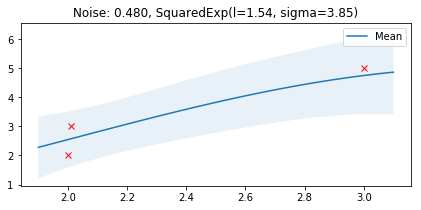

1.3132716875182229 1.3132716875182229 0.969114834544322 8.73884040423878
1.4312292737152166 3.78211033711408 1.901966681464332 7.078214685369378
1.421223676325187 3.558123852800462 1.8142003371332351 7.012353754702692
1.421223676325187 3.558123852800462 1.8142003371332351 7.012353754702692
1.5141964195908242 3.553701400182646 1.496574377647376 6.824268119999026
1.909455350457016 3.536017375994516 0.5418271527935792 6.620693856321573
1.6741286050321038 3.5463547211963857 1.0309132857665884 6.570339698075291
1.6741286050321038 3.5463547211963857 1.0309132857665884 6.570339698075291
1.932442981381544 3.7048219983393813 0.27500514742274085 8.275509424296034
1.6891911815370806 3.5558100108541715 0.9652327184535369 6.541531279400374
1.6891911815370806 3.5558100108541715 0.9652327184535369 6.541531279400374
1.6863492665557318 3.7385675355456893 0.548267560070367 6.534711619962019
1.688133903366739 3.6236822773559108 0.7916378681528237 6.479706596077732
1.688133903366739 3.6236822773559108 0.7

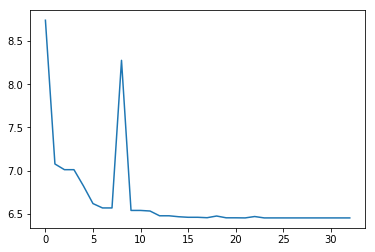

1.3132716875182229 1.3132716875182229 0.969114834544322 8.73884040423878
1.3205920739156571 1.3205920877396176 0.9753323710558225 8.697603698792774
1.3279258231742854 1.3279280597314334 0.9815694604162004 8.657214926010296
1.3352687802858214 1.3352768397834025 0.9878233533600027 8.617672407842761
1.3426169203807976 1.3426357156532813 0.9940912983380312 8.578973246627562
1.349966232808701 1.3500019030786767 1.0003704364133745 8.541114046564932
1.3573128259284446 1.3573726433151538 1.0066578846111007 8.50409044728226
1.3646529687448543 1.36474523866274 1.0129507669897262 8.467897024450153
1.3719830312364696 1.3721169875009767 1.019246160218626 8.432527686910852
1.3792995379281128 1.3794852341356714 1.0255411373708918 8.397975494823715
1.3865991986490735 1.3868473971791655 1.0318327937677962 8.364232604123401
1.3938788697562974 1.3942009291315993 1.0381182142800671 8.331290529038112
1.4011355874217646 1.4015433497242775 1.0443945038913403 8.299140056106102
1.40836658971265 1.4088722693012

2.0032629371382225 2.045905013496915 1.425679302941818 7.089960371631358
2.006364836499068 2.049927308858052 1.4259779069804988 7.087265880333945
2.0094315981762896 2.0539373722649543 1.4262448908448688 7.084600205993164
2.0124630082016304 2.057935361742327 1.4264806699582442 7.081962700867425
2.015458848729661 2.0619214316084182 1.4266856563988586 7.079352736570991
2.0184188988038305 2.065895733508852 1.4268602589324606 7.076769702796385
2.0213429350555288 2.0698584174026093 1.427004883006615 7.0742130061157305
2.024230730334618 2.073809629762015 1.4271199306293483 7.071682070604544
2.0270820544340187 2.0777495145736853 1.4272058003781567 7.069176336656868
2.0298966747494966 2.0816782142941883 1.4272628873736366 7.066695259872509
2.032674354987535 2.0855958680993303 1.4272915832004445 7.06423831167578
2.035414856467108 2.089502613733397 1.427292275894595 7.061804977668526
2.038117936878218 2.09339858578992 1.4272653498907881 7.05939475824484
2.0407833515335407 2.097283917525057 1.4272

2.0498843806233795 2.4651821758977213 1.321595905558184 6.874148607912495
2.0467549391386783 2.468450576869395 1.3198646950110018 6.872654548992875
2.043554183591324 2.47171706197455 1.3181184954712368 6.871158027077952
2.040281987799462 2.4749817041828135 1.3163571051613743 6.869658808508479
2.036938241074051 2.4782445766611465 1.3145803163458911 6.868156657556575
2.0335228489441506 2.4815057527652202 1.3127879153861644 6.8666513364429775
2.0300357339059625 2.4847653060294586 1.3109796828008242 6.865142605360186
2.0264768361959273 2.4880233101556977 1.3091553933318862 6.863630222501797
2.0228461145881362 2.4912798390004 1.3073148160170056 6.862113944098407
2.019143547216265 2.494534966560376 1.3054577142682218 6.860593524460475
2.0153691324202 2.497788766956953 1.3035838459575724 6.859068716028526
2.011522889617464 2.5010413144185355 1.3016929635099692 6.85753926943112
2.007604860199479 2.504292683261497 1.2997848140037533 6.856004933550997
2.003615108452654 2.5075429478693487 1.29785

1.4210054483085217 2.84509955903309 0.969213725442451 6.641498138420214
1.4173437779631195 2.8483804204418948 0.9650824147777198 6.639166270501887
1.4137762480968878 2.8516586803436286 0.9609603400040697 6.636846315539373
1.4103021075980853 2.8549342338077386 0.9568487647097603 6.634538951937236
1.406920493178933 2.858206976706682 0.9527489473207664 6.632244853601877
1.4036304356968246 2.8614768050493136 0.9486621403515015 6.629964689486007
1.4004308658297064 2.864743615258184 0.9445895884895182 6.627699122421255
1.397320620133444 2.868007304434808 0.9405325267254947 6.625448807923796
1.394298448304844 2.8712677696775395 0.9364921796916713 6.62321439361698
1.3913630194800575 2.874524908648033 0.9324697594786997 6.620996517756804
1.3885129299114851 2.8777786188832155 0.9284664650456775 6.618795808590972
1.3857467096603793 2.8810287983497553 0.9244834801328583 6.616612882846347
1.383062830502207 2.8842753447540552 0.9205219727510904 6.614448345044302
1.3804597128222378 2.8875181560886705

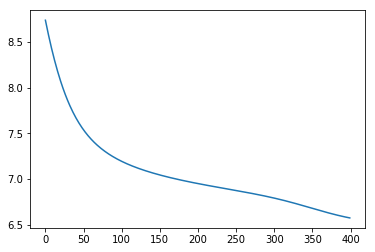

1.3132716875182229 1.3132716875182229 0.969114834544322 8.73884040423878
1.3205920739156571 1.3205920877396176 0.9753323710558225 8.697603698792774
1.3279258231742854 1.3279280597314334 0.9815694604162004 8.657214926010296
1.3352687802858214 1.3352768397834025 0.9878233533600027 8.617672407842761
1.3426169203807976 1.3426357156532813 0.9940912983380312 8.578973246627562
1.349966232808701 1.3500019030786767 1.0003704364133745 8.541114046564932
1.3573128259284446 1.3573726433151538 1.0066578846111007 8.50409044728226
1.3646529687448543 1.36474523866274 1.0129507669897262 8.467897024450153
1.3719830312364696 1.3721169875009767 1.019246160218626 8.432527686910852
1.3792995379281128 1.3794852341356714 1.0255411373708918 8.397975494823715
1.3865991986490735 1.3868473971791655 1.0318327937677962 8.364232604123401
1.3938788697562974 1.3942009291315993 1.0381182142800671 8.331290529038112
1.4011355874217646 1.4015433497242775 1.0443945038913403 8.299140056106102
1.40836658971265 1.4088722693012

1.9633731415764948 1.9966221024003095 1.419474183549103 7.124806132502149
1.9668811271065387 2.000804539385993 1.4201857679890342 7.121707588226723
1.9703562973100988 2.0049726178612697 1.4208605065406277 7.1186473468588805
1.9737984768550556 2.0091265334427324 1.4214988507726567 7.115624479243241
1.977207486986569 2.0132664781045593 1.4221012494656629 7.112638084371669
1.9805831455590994 2.017392640263096 1.4226681485695472 7.109687288438044
1.9839252679140607 2.021505205902618 1.4231999912965787 7.106771243189266
1.9872336651829643 2.0256043565483104 1.4236972177902052 7.103889126551028
1.9905081451916256 2.0296902704109434 1.4241602652392493 7.10104014100537
1.9937485124857843 2.0337631224646278 1.4245895678374032 7.0982235127688895
1.9969545683554661 2.0378230845228953 1.4249855567430052 7.095438490998841
2.000126111633406 2.0418703263024023 1.4253486601277696 7.09268434635549
2.0032629371382225 2.045905013496915 1.425679302941818 7.089960371631358
2.006364836499068 2.0499273088580

2.0796510878887093 2.4290826901413323 1.3397015515789261 6.890485430435977
2.077294004354627 2.432376914209064 1.3381236505249618 6.889003639521878
2.0748678318479663 2.4356684349849687 1.3365325752273975 6.887521818894655
2.0723723152140394 2.43895732302488 1.334928191800427 6.886039757425728
2.069807208262752 2.442243649102385 1.3333103600747431 6.884557242028679
2.0671722746242422 2.4455274837582586 1.3316789338355672 6.883074057835753
2.0644672875494052 2.4488088982135756 1.3300337603899506 6.881589987761727
2.061692030787002 2.4520879639135256 1.328374680808446 6.880104812688055
2.058846299133437 2.4553647525277245 1.3267015299466536 6.878618311444132
2.0559298990028774 2.458639335949566 1.325014136470077 6.877130260792125
2.0529426490182225 2.4619117862945767 1.3233123228825097 6.875640435415649
2.0498843806233795 2.4651821758977213 1.321595905558184 6.874148607912495
2.0467549391386783 2.468450576869395 1.3198646950110018 6.872654548992875
2.043554183591324 2.47171706197455 1.31

1.432561030987969 2.835242420887203 0.9816504010015821 6.64855839087902
1.4286136257650157 2.8385304530249504 0.9774989869272894 6.646194883933752
1.4247618935226751 2.841816201238949 0.9733530056187637 6.643841237702285
1.4210054483085217 2.84509955903309 0.969213725442451 6.641498138420214
1.4173437779631195 2.8483804204418948 0.9650824147777198 6.639166270501887
1.4137762480968878 2.8516586803436286 0.9609603400040697 6.636846315539373
1.4103021075980853 2.8549342338077386 0.9568487647097603 6.634538951937236
1.406920493178933 2.858206976706682 0.9527489473207664 6.632244853601877
1.4036304356968246 2.8614768050493136 0.9486621403515015 6.629964689486007
1.4004308658297064 2.864743615258184 0.9445895884895182 6.627699122421255
1.397320620133444 2.868007304434808 0.9405325267254947 6.625448807923796
1.394298448304844 2.8712677696775395 0.9364921796916713 6.62321439361698
1.3913630194800575 2.874524908648033 0.9324697594786997 6.620996517756804
1.3885129299114851 2.8777786188832155 0.

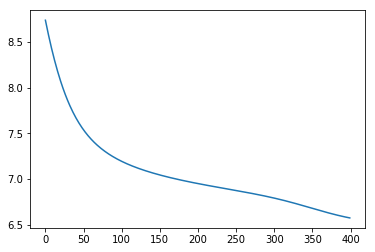

8.607807265589516

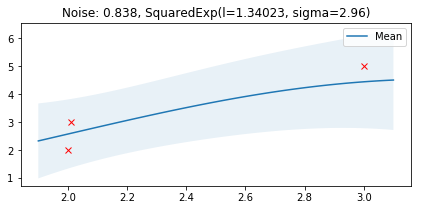

In [21]:
X_train = np.array([2,2.01,3])
y_train = np.array([2,3,5])

X = np.arange(min(X_train) - 0.1, max(X_train) + 0.1, step=0.01)

X_train = X_train.reshape(-1, 1)
X = X.reshape(-1, 1)

bopt.GaussianProcess(noise=0.48, kernel=bopt.SquaredExp(1.54, 3.85)).fit(X_train, y_train)\
    .posterior(X).plot_posterior(num_samples=0).log_prob()
plt.show()

bopt.GaussianProcess().fit(X_train, y_train)\
    .optimize_kernel().posterior(X).plot_posterior(num_samples=0).log_prob()

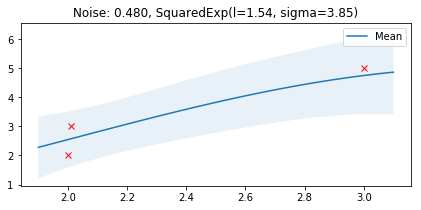

1.3132716875182229 1.3132716875182229 0.969114834544322 8.73884040423878
1.4312292737152166 3.78211033711408 1.901966681464332 7.078214685369378
1.421223676325187 3.558123852800462 1.8142003371332351 7.012353754702692
1.421223676325187 3.558123852800462 1.8142003371332351 7.012353754702692
1.5141964195908242 3.553701400182646 1.496574377647376 6.824268119999026
1.909455350457016 3.536017375994516 0.5418271527935792 6.620693856321573
1.6741286050321038 3.5463547211963857 1.0309132857665884 6.570339698075291
1.6741286050321038 3.5463547211963857 1.0309132857665884 6.570339698075291
1.932442981381544 3.7048219983393813 0.27500514742274085 8.275509424296034
1.6891911815370806 3.5558100108541715 0.9652327184535369 6.541531279400374
1.6891911815370806 3.5558100108541715 0.9652327184535369 6.541531279400374
1.6863492665557318 3.7385675355456893 0.548267560070367 6.534711619962019
1.688133903366739 3.6236822773559108 0.7916378681528237 6.479706596077732
1.688133903366739 3.6236822773559108 0.7

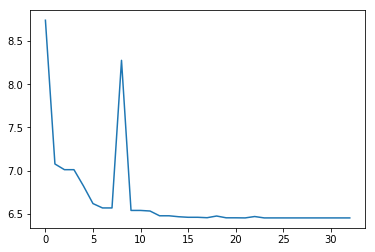

1.3132716875182229 1.3132716875182229 0.969114834544322 8.73884040423878
1.3205920739156571 1.3205920877396176 0.9753323710558225 8.697603698792774
1.3279258231742854 1.3279280597314334 0.9815694604162004 8.657214926010296
1.3352687802858214 1.3352768397834025 0.9878233533600027 8.617672407842761
1.3426169203807976 1.3426357156532813 0.9940912983380312 8.578973246627562
1.349966232808701 1.3500019030786767 1.0003704364133745 8.541114046564932
1.3573128259284446 1.3573726433151538 1.0066578846111007 8.50409044728226
1.3646529687448543 1.36474523866274 1.0129507669897262 8.467897024450153
1.3719830312364696 1.3721169875009767 1.019246160218626 8.432527686910852
1.3792995379281128 1.3794852341356714 1.0255411373708918 8.397975494823715
1.3865991986490735 1.3868473971791655 1.0318327937677962 8.364232604123401
1.3938788697562974 1.3942009291315993 1.0381182142800671 8.331290529038112
1.4011355874217646 1.4015433497242775 1.0443945038913403 8.299140056106102
1.40836658971265 1.4088722693012

1.977207486986569 2.0132664781045593 1.4221012494656629 7.112638084371669
1.9805831455590994 2.017392640263096 1.4226681485695472 7.109687288438044
1.9839252679140607 2.021505205902618 1.4231999912965787 7.106771243189266
1.9872336651829643 2.0256043565483104 1.4236972177902052 7.103889126551028
1.9905081451916256 2.0296902704109434 1.4241602652392493 7.10104014100537
1.9937485124857843 2.0337631224646278 1.4245895678374032 7.0982235127688895
1.9969545683554661 2.0378230845228953 1.4249855567430052 7.095438490998841
2.000126111633406 2.0418703263024023 1.4253486601277696 7.09268434635549
2.0032629371382225 2.045905013496915 1.425679302941818 7.089960371631358
2.006364836499068 2.049927308858052 1.4259779069804988 7.087265880333945
2.0094315981762896 2.0539373722649543 1.4262448908448688 7.084600205993164
2.0124630082016304 2.057935361742327 1.4264806699582442 7.081962700867425
2.015458848729661 2.0619214316084182 1.4266856563988586 7.079352736570991
2.0184188988038305 2.065895733508852

2.0300357339059625 2.4847653060294586 1.3109796828008242 6.865142605360186
2.0264768361959273 2.4880233101556977 1.3091553933318862 6.863630222501797
2.0228461145881362 2.4912798390004 1.3073148160170056 6.862113944098407
2.019143547216265 2.494534966560376 1.3054577142682218 6.860593524460475
2.0153691324202 2.497788766956953 1.3035838459575724 6.859068716028526
2.011522889617464 2.5010413144185355 1.3016929635099692 6.85753926943112
2.007604860199479 2.504292683261497 1.2997848140037533 6.856004933550997
2.003615108452654 2.5075429478693487 1.2978591392793561 6.854465455599824
1.999553722504192 2.5107921826701225 1.2959156760565098 6.852920581202026
1.995420814762004 2.5140404625290156 1.293954155808728 6.851370054288953
1.9912165239549935 2.5172878618848795 1.291974305399433 6.849813617600093
1.9869410156359273 2.52053445514193 1.2899758469786902 6.848251012597979
1.9825944832235909 2.523780316639418 1.2879584981394059 6.846681979592919
1.9781771490678366 2.5270255206192247 1.285921

1.366443966211972 2.9068908440248817 0.893486959410457 6.599859092023468
1.364359201718764 2.910104632084778 0.889736998324334 6.597861561193561
1.3623415956812717 2.9133138586951675 0.8860181142261648 6.595887117829253
1.3603894296739065 2.9165184183693533 0.882331254858015 6.593936182797664
1.3585010016012198 2.9197182053121917 0.878677340793588 6.592009153049448
1.356674631152555 2.922913113093659 0.875057265116879 6.590106401012953
1.354908664834941 2.9261030343360575 0.8714718931291676 6.588228274036533
1.3532014800973815 2.9292878612950215 0.8679220611030326 6.586375093372877
1.3515514896973848 2.932467485270277 0.8644085764134218 6.58454715393176
1.3499571449944088 2.9356417972006175 0.8609322163983446 6.58274472341812
1.3484169392821057 2.9388106873875675 0.8574937282484923 6.580968042061134
1.3469294106522527 2.941974045233891 0.8540938289182288 6.5792173224061585
1.345493144001014 2.9451317598601925 0.8507332041383476 6.577492748701768
1.3441067730278413 2.9482837198598926 0.

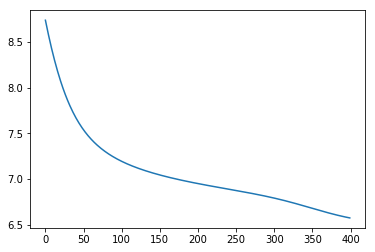

1.3132716875182229 1.3132716875182229 0.969114834544322 8.73884040423878
1.3205920739156571 1.3205920877396176 0.9753323710558225 8.697603698792774
1.3279258231742854 1.3279280597314334 0.9815694604162004 8.657214926010296
1.3352687802858214 1.3352768397834025 0.9878233533600027 8.617672407842761
1.3426169203807976 1.3426357156532813 0.9940912983380312 8.578973246627562
1.349966232808701 1.3500019030786767 1.0003704364133745 8.541114046564932
1.3573128259284446 1.3573726433151538 1.0066578846111007 8.50409044728226
1.3646529687448543 1.36474523866274 1.0129507669897262 8.467897024450153
1.3719830312364696 1.3721169875009767 1.019246160218626 8.432527686910852
1.3792995379281128 1.3794852341356714 1.0255411373708918 8.397975494823715
1.3865991986490735 1.3868473971791655 1.0318327937677962 8.364232604123401
1.3938788697562974 1.3942009291315993 1.0381182142800671 8.331290529038112
1.4011355874217646 1.4015433497242775 1.0443945038913403 8.299140056106102
1.40836658971265 1.4088722693012

1.9905081451916256 2.0296902704109434 1.4241602652392493 7.10104014100537
1.9937485124857843 2.0337631224646278 1.4245895678374032 7.0982235127688895
1.9969545683554661 2.0378230845228953 1.4249855567430052 7.095438490998841
2.000126111633406 2.0418703263024023 1.4253486601277696 7.09268434635549
2.0032629371382225 2.045905013496915 1.425679302941818 7.089960371631358
2.006364836499068 2.049927308858052 1.4259779069804988 7.087265880333945
2.0094315981762896 2.0539373722649543 1.4262448908448688 7.084600205993164
2.0124630082016304 2.057935361742327 1.4264806699582442 7.081962700867425
2.015458848729661 2.0619214316084182 1.4266856563988586 7.079352736570991
2.0184188988038305 2.065895733508852 1.4268602589324606 7.076769702796385
2.0213429350555288 2.0698584174026093 1.427004883006615 7.0742130061157305
2.024230730334618 2.073809629762015 1.4271199306293483 7.071682070604544
2.0270820544340187 2.0777495145736853 1.4272058003781567 7.069176336656868
2.0298966747494966 2.081678214294188

2.007604860199479 2.504292683261497 1.2997848140037533 6.856004933550997
2.003615108452654 2.5075429478693487 1.2978591392793561 6.854465455599824
1.999553722504192 2.5107921826701225 1.2959156760565098 6.852920581202026
1.995420814762004 2.5140404625290156 1.293954155808728 6.851370054288953
1.9912165239549935 2.5172878618848795 1.291974305399433 6.849813617600093
1.9869410156359273 2.52053445514193 1.2899758469786902 6.848251012597979
1.9825944832235909 2.523780316639418 1.2879584981394059 6.846681979592919
1.9781771490678366 2.5270255206192247 1.2859219720845358 6.845106257879181
1.9736892655368485 2.5302701411913215 1.2838659778058437 6.843523585883078
1.969131116125812 2.5335142522970444 1.281790220274754 6.841933701323496
1.9645030160054777 2.5367579280772405 1.2796944003829638 6.840336341184692
1.9598053143177805 2.5400012420141214 1.2775782156815338 6.8387312423033055
1.9550383947755774 2.543244267297431 1.2754413603516743 6.837118141369274
1.950202676846172 2.546487076778469 1

1.3532014800973815 2.9292878612950215 0.8679220611030326 6.586375093372877
1.3515514896973848 2.932467485270277 0.8644085764134218 6.58454715393176
1.3499571449944088 2.9356417972006175 0.8609322163983446 6.58274472341812
1.3484169392821057 2.9388106873875675 0.8574937282484923 6.580968042061134
1.3469294106522527 2.941974045233891 0.8540938289182288 6.5792173224061585
1.345493144001014 2.9451317598601925 0.8507332041383476 6.577492748701768
1.3441067730278413 2.9482837198598926 0.8474125084176629 6.575794476858549
1.3427689816607142 2.9514298133541885 0.8441323647644775 6.574122634323313
1.3414785051818758 2.9545699277713995 0.840893364738786 6.572477320183215


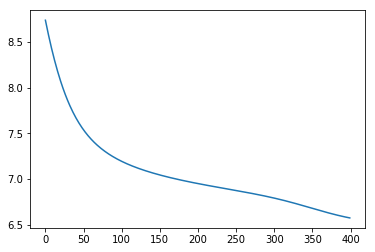

8.607807265589516

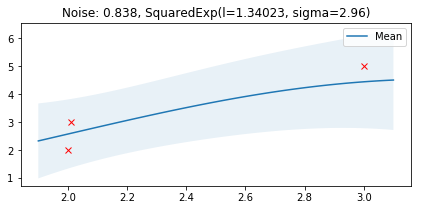

In [22]:
X_train = np.array([2,2.01,3])
y_train = np.array([2,3,5])

X = np.arange(min(X_train) - 0.1, max(X_train) + 0.1, step=0.01)

X_train = X_train.reshape(-1, 1)
X = X.reshape(-1, 1)

bopt.GaussianProcess(noise=0.48, kernel=bopt.SquaredExp(1.54, 3.85)).fit(X_train, y_train)\
    .posterior(X).plot_posterior(num_samples=0).log_prob()
plt.show()

bopt.GaussianProcess().fit(X_train, y_train)\
    .optimize_kernel().posterior(X).plot_posterior(num_samples=0).log_prob()

[1.55871157 3.8447925  0.69515908]


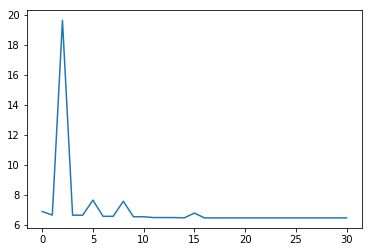

[1.55871158 3.8447925  0.69515908]


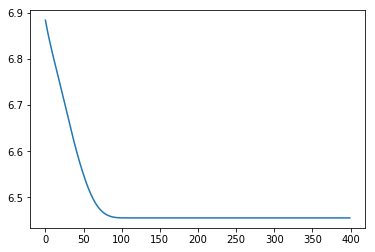

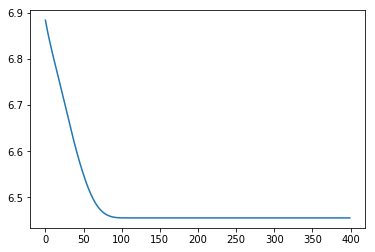

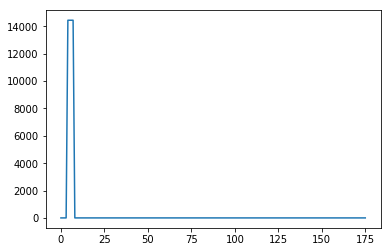

8.073871424163931

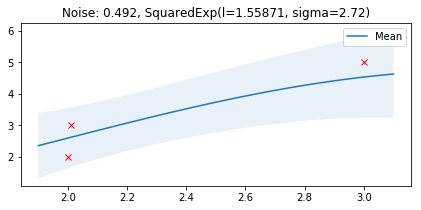

In [15]:
bopt.GaussianProcess().fit(X_train, y_train)\
    .optimize_kernel().posterior(X).plot_posterior(num_samples=0).log_prob()

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

8.426365651534852

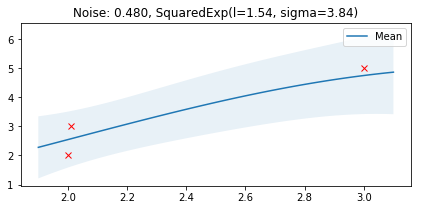

In [110]:
bopt.GaussianProcess(noise=0.48, kernel=bopt.SquaredExp(1.54, 3.84)).fit(X_train, y_train)\
    .posterior(X).plot_posterior(num_samples=0).log_prob()

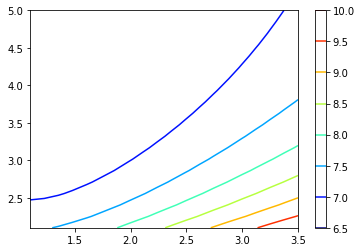

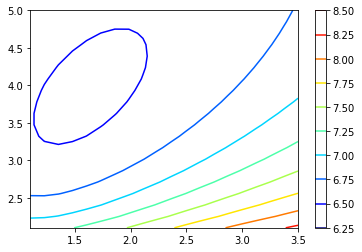

In [306]:
from functools import partial


def plot_kernel_nll(X, Y):    
    res = 20

    L = np.linspace(1.1, 3.5, num=res, dtype=np.float64)
    S = np.linspace(2.1, 5., num=res, dtype=np.float64)
    
    l, s = np.meshgrid(L, S)
    
    def nll_gp(x, y):
        return bopt.GaussianProcess(noise=0.48, kernel=bopt.SquaredExp(x, y)).fit(X_train, y_train)\
            .posterior(X).log_prob()
    
    rows = np.array(np.vectorize(partial(nll_gp))(l, s))
    plt.contour(L, S, rows, cmap="jet")
    plt.colorbar()
    plt.show()

    
plot_kernel_nll(X_train, y_train)

from functools import partial


def plot_kernel_nll(X, Y):    
    res = 20

    L = np.linspace(1.1, 3.5, num=res, dtype=np.float64)
    S = np.linspace(2.1, 5., num=res, dtype=np.float64)
    
    l, s = np.meshgrid(L, S)
    rows = np.array(np.vectorize(partial(gp_nll, X, Y))(l, s))
#     plt.pcolor(L, S, rows, cmap="jet")
    plt.contour(L, S, rows, cmap="jet")
    plt.colorbar()
    plt.show()
    

plot_kernel_nll(X_train, y_train)

Step 0: NLL = 47.58521210322328, ls = 1.0, amp = 1.0, obsnoise = 0.006737946999085467
Step 100: NLL = 8.107891685193204, ls = 1.2904813296942597, amp = 3.588332925539896, obsnoise = 0.07733757677354744
Step 200: NLL = 6.722094153049945, ls = 1.4810553723732585, amp = 3.875782377097542, obsnoise = 0.19672708591532662
Step 300: NLL = 6.4958037412706675, ls = 1.5226335005371312, amp = 3.872039432236173, obsnoise = 0.3281195493107196
Step 400: NLL = 6.458684435685816, ls = 1.5462025482712682, amp = 3.855249399625497, obsnoise = 0.42811418478029445
Step 500: NLL = 6.455163262665023, ls = 1.5565054221630445, amp = 3.846683830603256, obsnoise = 0.47349039834359535
Step 600: NLL = 6.455064564028334, ls = 1.5585924496309245, amp = 3.8448950526355605, obsnoise = 0.48271828436123315
Step 700: NLL = 6.45506428274185, ls = 1.5587107667228441, amp = 3.8447932026375593, obsnoise = 0.48324156263394347
Step 800: NLL = 6.455064937846138, ls = 1.5573931436761654, amp = 3.8453370788482055, obsnoise = 0.48

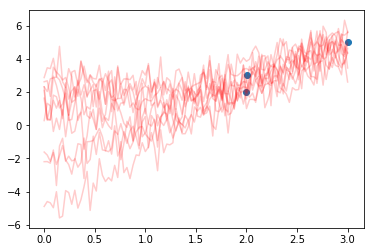

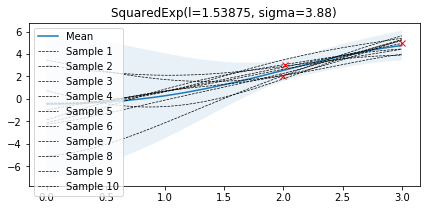

In [252]:
g = tf.Graph()
with g.as_default():

    # Suppose we have some data from a known function. Note the index points in
    # general have shape `[b1, ..., bB, f1, ..., fF]` (here we assume `F == 1`),
    # so we need to explicitly consume the feature dimensions (just the last one
    # here).
    f = lambda x: np.sin(10*x[..., 0]) * np.exp(-x[..., 0]**2)

    # observation_index_points = np.random.uniform(-1., 1., 50)[..., np.newaxis]
    # observations = f(observation_index_points) + np.random.normal(0., .05, 50)
    
    observation_index_points = X_train.reshape(-1, 1).astype(dtype=np.float64)
    observations = y_train.astype(dtype=np.float64) #.reshape(-1, 1)

    # Define a kernel with trainable parameters. Note we transform the trainable
    # variables to apply a positivity constraint.
    amplitude = tf.exp(tf.Variable(np.float64(0)), name='amplitude')
    length_scale = tf.exp(tf.Variable(np.float64(0)), name='length_scale')
    kernel = psd_kernels.ExponentiatedQuadratic(amplitude, length_scale)

    observation_noise_variance = tf.exp(
        tf.Variable(np.float64(-5)), name='observation_noise_variance')

    # We'll use an unconditioned GP to train the kernel parameters.
    gp = tfd.GaussianProcess(
        kernel=kernel,
        index_points=observation_index_points,
        observation_noise_variance=observation_noise_variance)
    neg_log_likelihood = -gp.log_prob(observations)

    optimizer = tf.train.AdamOptimizer(learning_rate=.05, beta1=.5, beta2=.99)
    optimize = optimizer.minimize(neg_log_likelihood)

    # We can construct the posterior at a new set of `index_points` using the same
    # kernel (with the same parameters, which we'll optimize below).
    index_points = np.linspace(0., 3., 100)[..., np.newaxis]
    gprm = tfd.GaussianProcessRegressionModel(
        kernel=kernel,
        index_points=index_points,
        observation_index_points=observation_index_points,
        observations=observations,
        observation_noise_variance=observation_noise_variance)

    samples = gprm.sample(10)
    # ==> 10 independently drawn, joint samples at `index_points`.

    # Now execute the above ops in a Session, first training the model
    # parameters, then drawing and plotting posterior samples.
    with tf.Session(graph=g) as sess:
      sess.run(tf.global_variables_initializer())

      for i in range(1000):
        _, neg_log_likelihood_, ls_, amp_, obsnoise_ = sess.run([optimize, neg_log_likelihood, length_scale, amplitude,
                                                     observation_noise_variance])
        if i % 100 == 0:
          print("Step {}: NLL = {}, ls = {}, amp = {}, obsnoise = {}".format(i, neg_log_likelihood_, ls_, amp_,
                                                                            obsnoise_))

      print("Final NLL = {}".format(neg_log_likelihood_))
      samples_ = sess.run(samples)

      plt.scatter(np.squeeze(observation_index_points), observations)
      plt.plot(np.stack([index_points[:, 0]]*10).T, samples_.T, c='r', alpha=.2)
        
      bopt.GaussianProcess(noise=obsnoise_, kernel=bopt.SquaredExp(l=ls_, sigma=amp_)) \
          .fit(observation_index_points.reshape(-1), observations) \
          .posterior(index_points.reshape(-1)) \
          .plot_posterior(num_samples=10)

In [ ]:




# rows = l + s**2

# plt.pcolor(L, S, rows)
# plt.show()

# plt.imshow(rows)
# plt.show()

# rows = []
# for l in L:
#     row = []
    
#     for s in S:
#         row.append(round(l + s**2, 2))
        
#     rows.append(row)
    
# plt.imshow(rows)
# plt.show()

# plt.pcolor(L, S, rows)

In [64]:
rows

[[0.0, 0.31, 1.23, 2.78, 4.94, 7.72, 11.11, 15.12, 19.75, 25.0],
 [0.56, 0.86, 1.79, 3.33, 5.49, 8.27, 11.67, 15.68, 20.31, 25.56],
 [1.11, 1.42, 2.35, 3.89, 6.05, 8.83, 12.22, 16.23, 20.86, 26.11],
 [1.67, 1.98, 2.9, 4.44, 6.6, 9.38, 12.78, 16.79, 21.42, 26.67],
 [2.22, 2.53, 3.46, 5.0, 7.16, 9.94, 13.33, 17.35, 21.98, 27.22],
 [2.78, 3.09, 4.01, 5.56, 7.72, 10.49, 13.89, 17.9, 22.53, 27.78],
 [3.33, 3.64, 4.57, 6.11, 8.27, 11.05, 14.44, 18.46, 23.09, 28.33],
 [3.89, 4.2, 5.12, 6.67, 8.83, 11.6, 15.0, 19.01, 23.64, 28.89],
 [4.44, 4.75, 5.68, 7.22, 9.38, 12.16, 15.56, 19.57, 24.2, 29.44],
 [5.0, 5.31, 6.23, 7.78, 9.94, 12.72, 16.11, 20.12, 24.75, 30.0]]

In [18]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

11493376/11490434 [==============================] - 1s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2186 - acc: 0.9364
Epoch 2/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0962 - acc: 0.9705
Epoch 3/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0694 - acc: 0.9777
Epoch 4/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0533 - acc: 0.9824
Epoch 5/5
 9472/10000 [===========================>..] - ETA: 0s - loss: 0.0622 - acc: 0.9817

[0.06504089111908107, 0.981]

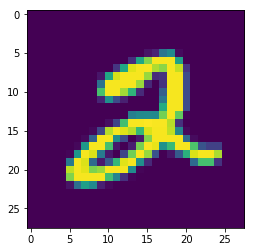

In [33]:
plt.imshow(x_train[5])

In [ ]:
global_step = tf.Variable(0)

w = tf.Variable(...)
x = tf.placeholder(...)

for i in range(1000):
    with tf.GradientTape() as tape:
        y_hat = w*x
        loss = mse(y, y_hat)
        
    global_step += 1
    
    grad = tape.gradient(loss, w)
    
    w -= lr * grad + momentum + ...
    # optimizer.apply(grad, w)

Step 0: NLL = 5024332.975207582
Step 100: NLL = 3864126.523483494
Step 200: NLL = 3061352.5084211207
Step 300: NLL = 2375648.0301485984
Step 400: NLL = 572836.1503184572
Step 500: NLL = 165756.49271280586
Step 600: NLL = 82189.7502202721
Step 700: NLL = 43176.59958718666
Step 800: NLL = 24132.40501042346
Step 900: NLL = 14840.71298407831
1.3720442867086349 0.4318168711500862


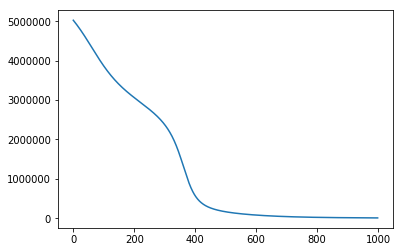

In [12]:
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-2)
optimizer = tf.train.AdamOptimizer()

length_scale = tf.Variable(1., dtype=tf.float64)
amplitude = tf.Variable(1., dtype=tf.float64)
variables = [amplitude, length_scale]


ll = []

for i in range(1000):
    with tf.GradientTape() as t:
        nll = gp_nll(observed_index_points, observed_values, length_scale, amplitude)

    grad = t.gradient(nll, variables)

    optimizer.apply_gradients(zip(grad, variables))

    if i % 100 == 0:
        print("Step {}: NLL = {}".format(i, nll))
    ll.append(nll)
    
plt.plot(ll)
print(amplitude.numpy(), length_scale.numpy())

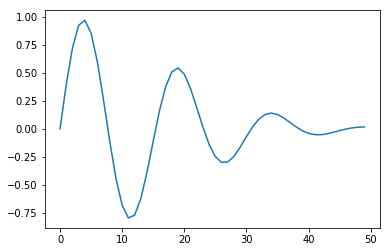

In [15]:
plt.plot(f(np.linspace(0,2).reshape(-1, 1)))

In [ ]:
noise = 1

params = [0.1, 0.3]#, 0.6, 0.9]

#X_train = np.array([0, 0.02, 0.05, 0.3, 0.4,1,1.1,1.2,1.3,1.4,2,3,4])

X_train = np.array([2,2.01,3])#, 0.02, 0.05, 0.3, 0.4,1,2,3,4])
y_train = np.array([2,3,5])

# X_train = np.array([2,2.01,2.02,3])#, 0.02, 0.05, 0.3, 0.4,1,2,3,4])
# y_train = np.array([2,3,2,100])


# y_train[1] = .6
# y_train[2] = 1

X = np.arange(min(X_train) - 0.1, max(X_train) + 0.1, step=0.01)